# Let us build a Learning Machine and teach it to read handwritten digits

Luca Mari, February 2025

This work is licensed under CC BY-NC-SA 4.0. To view a copy of this license, visit https://creativecommons.org/licenses/by-nc-sa/4.0.  
<img src="https://creativecommons.it/chapterIT/wp-content/uploads/2021/01/by-nc-sa.eu_.png" width="100">

### 1. Planning the training

<h5>Let us get the teaching materials from the web: a bunch of images of handwritten digits, each of them with the information of the corresponding digit.  

And since we want to be sure that our pupil learns, and not just memorizes, let us use some images for training, and some _other_ images for testing.</h5>

In [1]:
from mnistutils_en import load_data, show_images, train_loop, test_loop, test_with_prob, test_loop_with_trace 
import torch
from torch import nn

train_data, test_data = load_data()

print(f"Number of images in the training set: {len(train_data)}")
print(f"Number of images in the test set: {len(test_data)}")

Number of images in the training set: 60000
Number of images in the test set: 10000


<h5>Let us show some examples of the images, each of them with the information of the digit written in it.</h5>

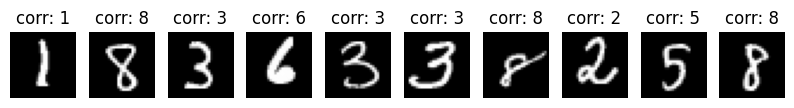

In [2]:
show_images(train_data)

<h5>Teaching how to read is clearly a hard problem!</h5> 

### 2. Building our pupil

<h5>Since each image is made of ~1000 points and there are 10 possible digits, our pupil needs

* ~1000 sensitive points of its _eye_ to read each image, and
* 10 _voices_ to tell us which digit it has read,

... and, of course, in between

* a _brain_, where the learning should happen.

Let us build a very simple pupil, with a brain of only 10 _neurons_, each connected to each sensitive point of the eye and to each voice, then with ~10000 _synapses_.

![net](mnist_en_pres.drawio.svg)
</h5>

In [3]:
class ReadingPupil(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(   # Sequential() builds a sequence of components
            nn.Linear(28*28, 10),       # Linear(x, y) builds the connection among all x neurons of the first layer and all y neurons of the second layer
            nn.ReLU(),                  # ReLU() sets ReLu (rectified linear unit) as the activation function of the output signal of each neuron
            nn.Linear(10, 10)
        )

    def forward(self, x):
        x = nn.Flatten()(x)             # Flatten() makes the input unidimensional, thus adapting the images to the input layer
        return self.network(x)
    
pupil = ReadingPupil()
print("The pupil has been built up.")

The pupil has been built up.


<h5>We can already ask our pupil to read, but without any training its answers will be just random.<h5>

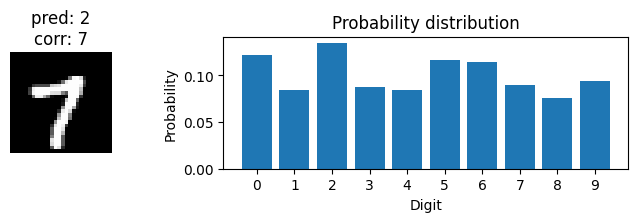

In [7]:
test_with_prob(test_data, pupil)

### 3. Training the pupil

<h5>Let us first set the basic rules of teaching.</h5>

In [9]:
learning_rate = 1e-3                    # hyperparameters for training 
batch_size = 50
num_batches = 500
epochs = 30

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(pupil.parameters(), lr=learning_rate)

<h5>We are finally ready to train the pupil!</h5>

Day	Accuracy
1	18.0%
2	30.0%
3	48.0%
4	52.0%
5	54.0%
6	60.0%
7	62.0%
8	68.0%
9	64.0%
10	78.0%
11	76.0%
12	88.0%
13	72.0%
14	84.0%
15	84.0%
16	80.0%
17	88.0%
18	80.0%
19	84.0%
20	74.0%
21	78.0%
22	86.0%
23	88.0%
24	86.0%
25	80.0%
26	86.0%
27	86.0%
28	86.0%
29	90.0%
30	92.0%
Process completed in 47.47 seconds


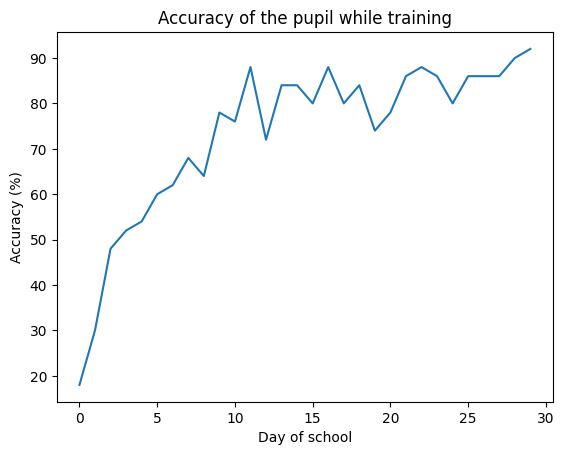

In [10]:
import time
import matplotlib.pyplot as plt

start_time = time.time()
accuracy = []
print("Day\tAccuracy")
for t in range(epochs):
    train_loop(train_data, batch_size, num_batches, pupil, loss_fn, optimizer)
    correct = test_loop(test_data, batch_size, pupil) / batch_size * 100
    print(f"{t + 1}\t{correct:.1f}%")
    accuracy.append(correct)
end_time = time.time()

print(f"Process completed in {end_time - start_time:.2f} seconds")
plt.plot(range(epochs), accuracy)
plt.xlabel("Day of school")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of the pupil while training")
plt.show()

### 4. Testing pupil's reading ability

<h5>Now that the pupil has been trained, we can evaluate the accuracy of its reading by asking it to read some test images.</h5>

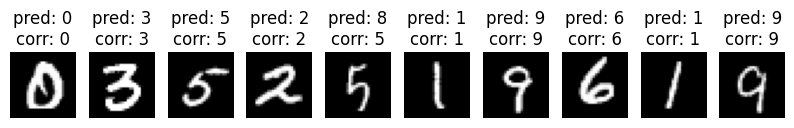

In [27]:
test_loop_with_trace(test_data, pupil)

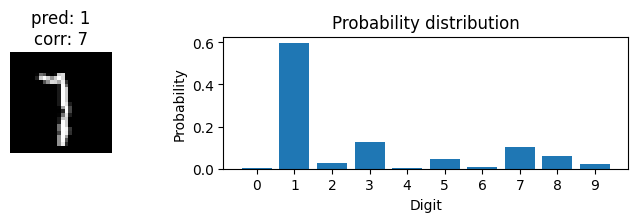

In [20]:
test_with_prob(test_data, pupil)

### 5. Summary

<h5>Here we:

1. built up a simple artificial neural network and proved that without a training its reading ability is null;

2. trained the network by means of a labeled training set;

3. tested the trained network, and assessed its reading ability.

Hence, we developed a simple **Learning Machine**.</h5>